In [25]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #MultinomialNB BernoulliNB
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
# GaussianNB uses normal distribution - Equal distribution in all evens - 0.5 and 0.5 - structured data
# BernoulliNB uses Poission Distribution - Two possible outcomes - 0 or 1 - structured data
# MultinomialNB may have multivariate poission distribution - many outcomes - unstructured data

In [3]:
df = pd.read_csv("D:/Study/MCA/4th Sem/DA/weather.csv")
df.head()

,Id,Outlook,Temperature,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No
2,3,Overcast,Hot,High,False,Yes
3,4,Rainy,Mild,High,False,Yes
4,5,Rainy,Cool,Normal,False,Yes


In [4]:
df.isnull().sum()

Id             0
Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [5]:
# One hot encoding - Label into numbers
le = preprocessing.LabelEncoder()
df['Outlook'] = le.fit_transform(df.Outlook)
df['Temperature'] = le.fit_transform(df.Temperature)
df['Humidity'] = le.fit_transform(df.Humidity)
df['Windy'] = le.fit_transform(df.Windy)
df['Play'] = le.fit_transform(df.Play)
df.head()

,Id,Outlook,Temperature,Humidity,Windy,Play
0,1,2,1,0,0,0
1,2,2,1,0,1,0
2,3,0,1,0,0,1
3,4,1,2,0,0,1
4,5,1,0,1,0,1


In [6]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
Y = df['Play']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.ndim)
print(X_test.ndim)
print(Y_train.ndim)
print(Y_test.ndim)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

2
2
1
1
11
3
11
3


# GaussianNB

In [7]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
Y_pred = model.predict(X_test)
print(Y_pred)

[1 1 0]


In [10]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :", cm)

Confusion Matrix : [[1 0]
 [0 2]]


In [11]:
accu = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score", accu * 100)
print(round(accu,1))

Accuracy Score 100.0
1.0


AUC:1.000
fpr : [0. 0. 1.]

tpr : [0. 1. 1.]
Threshold : [2 1 0]


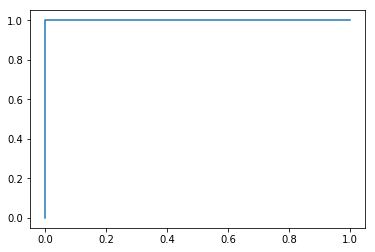

In [12]:
#calculate AUC - Area Under Curve
auc = roc_auc_score(Y_test, Y_pred)
print('AUC:%.3f' % auc)

# calculate ROC curve - Receiveral Operation Characteristics
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
print("fpr :", fpr)
print("\ntpr :", tpr)
print("Threshold :", thresholds)

#plot the roc curve for the model
plt.plot(fpr, tpr)
plt.show()

# BernoulliNB

In [14]:
from sklearn.naive_bayes import BernoulliNB
# clf2 = BernoulliNB(class_prior = [0.10, 0.90])

# modelB = clf2.fit(X_train, Y_train)
# modelB.predict(X_test)

bn = BernoulliNB()
bn.fit(X_train, Y_train)
Y_pred = bn.predict(X_test)

cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :", cm)

accu = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score", accu * 100)
print(round(accu,1))

Confusion Matrix : [[1 0]
 [1 1]]
Accuracy Score 66.66666666666666
0.7


# MultinomialNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train, Y_train)
Y_pred = mn.predict(X_test)

cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :", cm)

accu = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score", accu * 100)
print(round(accu,1))

Confusion Matrix : [[0 1]
 [0 2]]
Accuracy Score 66.66666666666666
0.7


# KNN Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) #Building model or classifier
#build the classifier
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :", cm)

accu = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score", accu * 100)
print(round(accu, 1))

Confusion Matrix : [[0 1]
 [0 2]]
Accuracy Score 66.66666666666666
0.7


AUC:0.500
fpr : [0. 1.]

tpr : [0. 1.]
Threshold : [2 1]


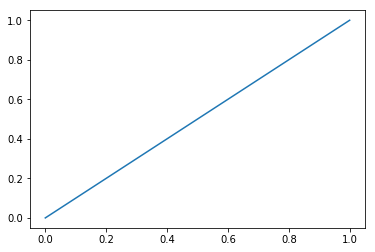

In [22]:
#calculate AUC - Area Under Curve
auc = roc_auc_score(Y_test, Y_pred)
print('AUC:%.3f' % auc)

# calculate ROC curve - Receiveral Operation Characteristics
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
print("fpr :", fpr)
print("\ntpr :", tpr)
print("Threshold :", thresholds)

#plot the roc curve for the model
plt.plot(fpr, tpr)
plt.show()

In [27]:
# Finding the optimal k
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

In [28]:
print(error)

[0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333]


Text(0, 0.5, 'Mean Error')

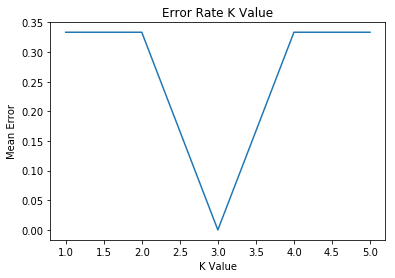

In [30]:
plt.plot(range(1, 6), error)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')